In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Load the performance data
rtx2080_data = pd.read_csv('matrix_transpose_RTX2080_performance.csv')
a100_data = pd.read_csv('matrix_transpose_A100_performance.csv')

In [3]:
all_data = pd.concat([rtx2080_data, a100_data])

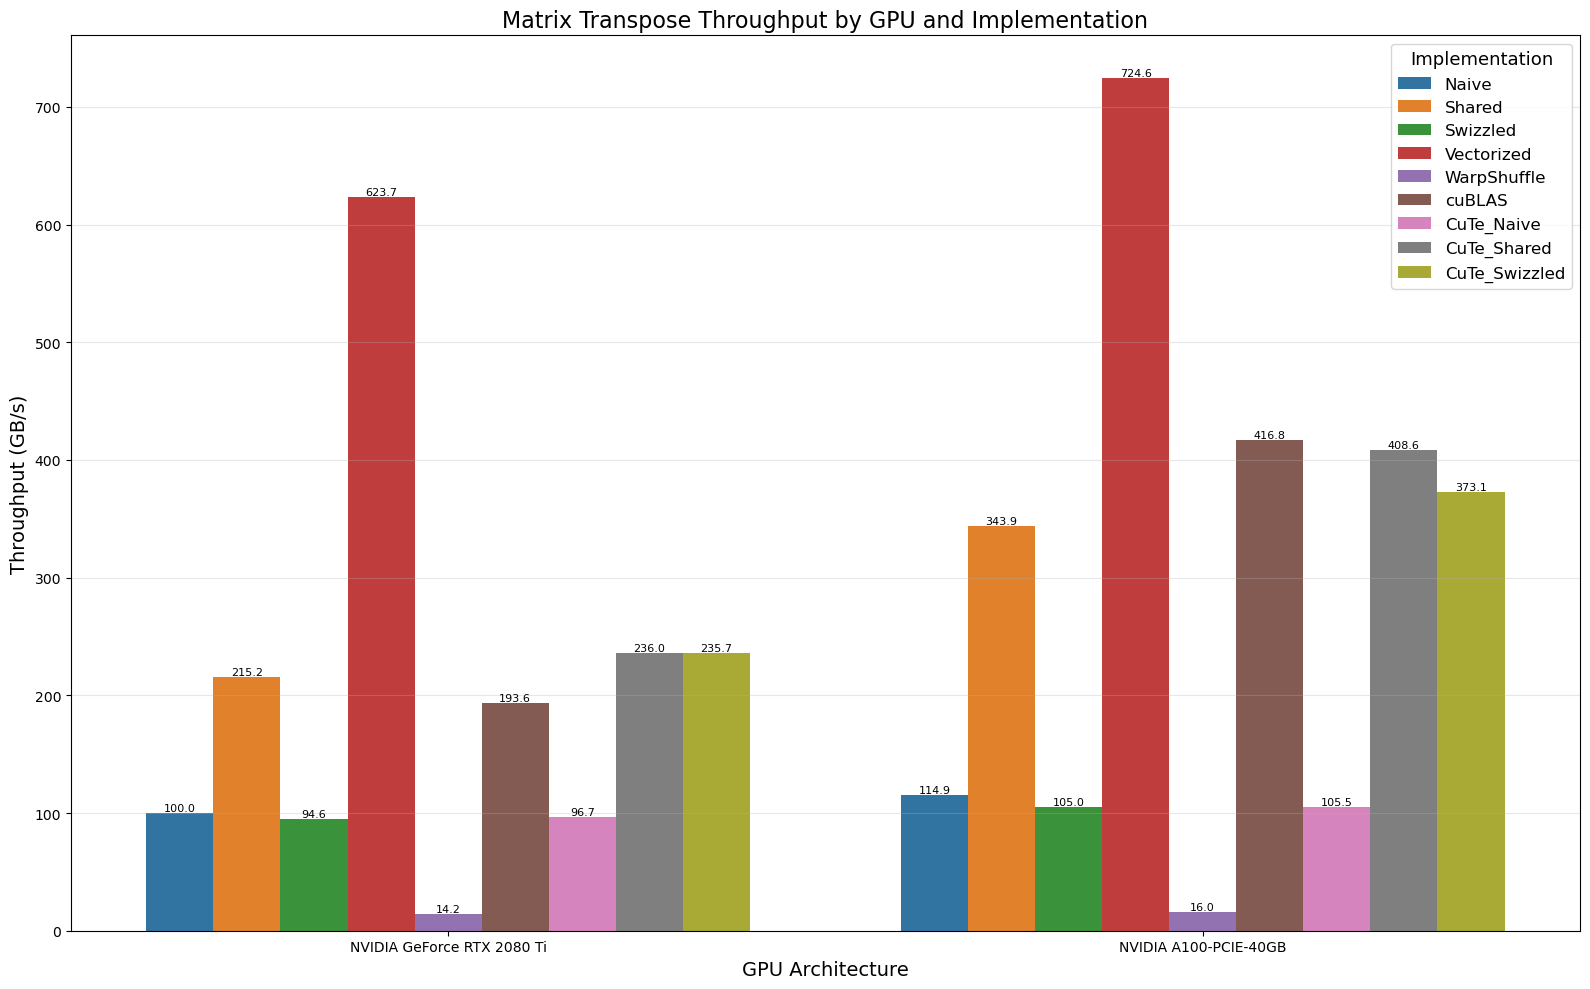

In [5]:
# 1. Visualization: Throughput by GPU and Implementation
# (Group implementations by GPU architecture)
plt.figure(figsize=(16, 10))
ax = sns.barplot(x='GPU', y='Throughput_GBps', hue='Implementation', data=all_data, errorbar=None)

# Improve the aesthetics
plt.title('Matrix Transpose Throughput by GPU and Implementation', fontsize=16)
plt.xlabel('GPU Architecture', fontsize=14)
plt.ylabel('Throughput (GB/s)', fontsize=14)
plt.legend(title='Implementation', fontsize=12, title_fontsize=13)
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=8)

plt.tight_layout()
plt.savefig('throughput_by_gpu_implementation.png', dpi=300)
plt.show()

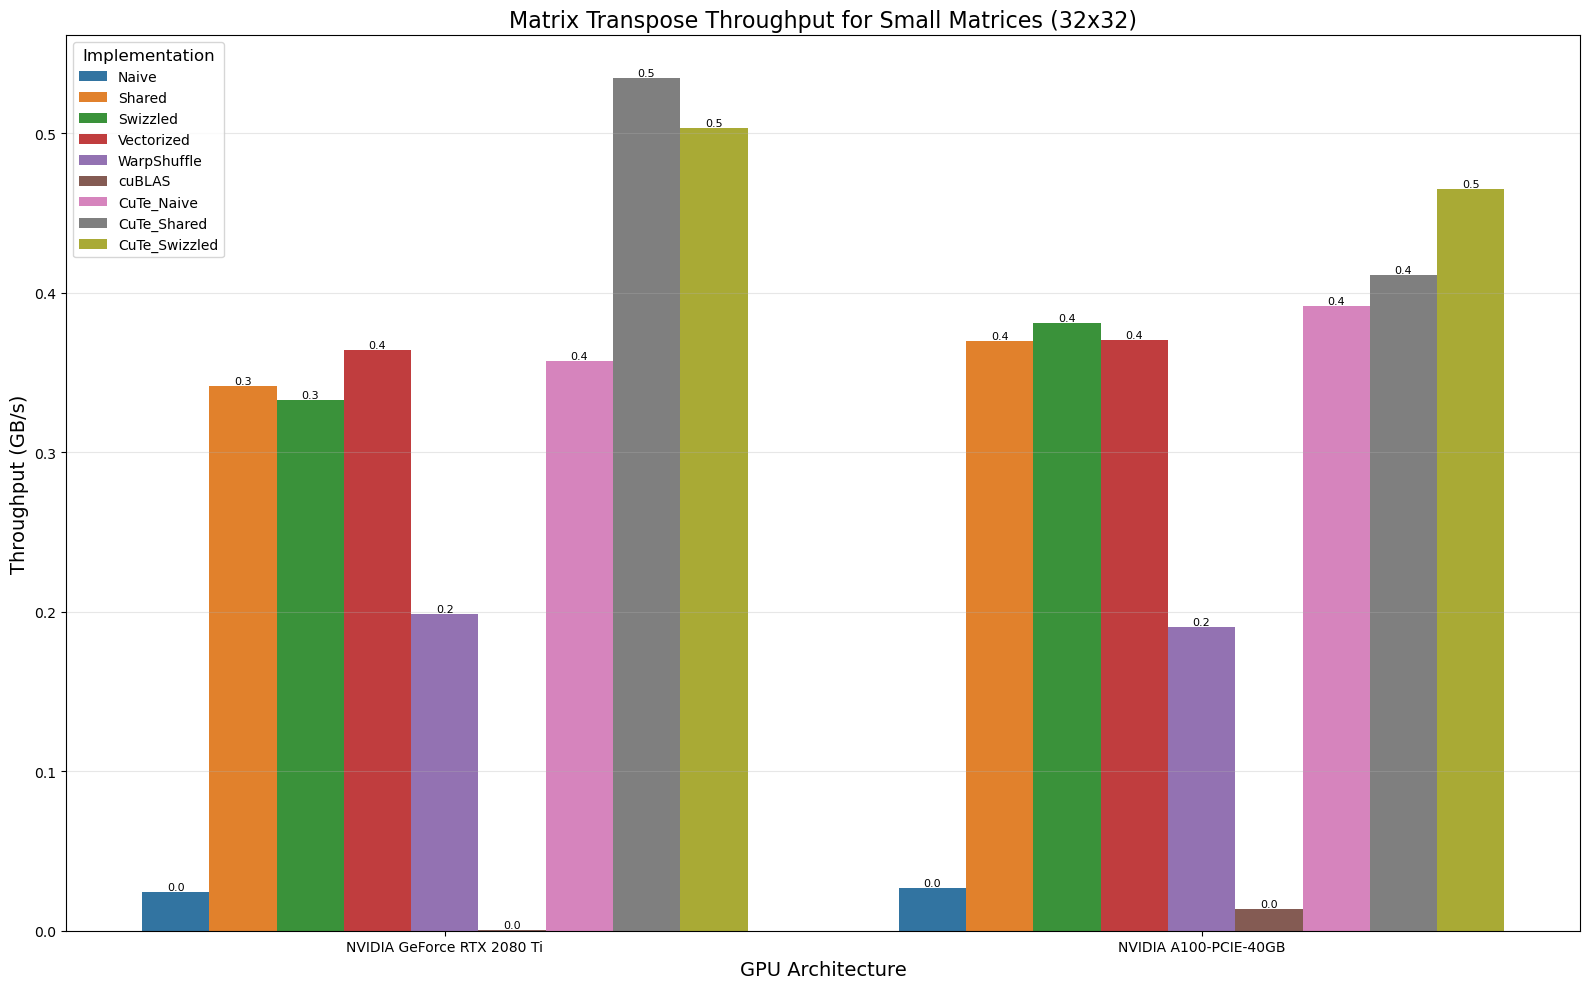

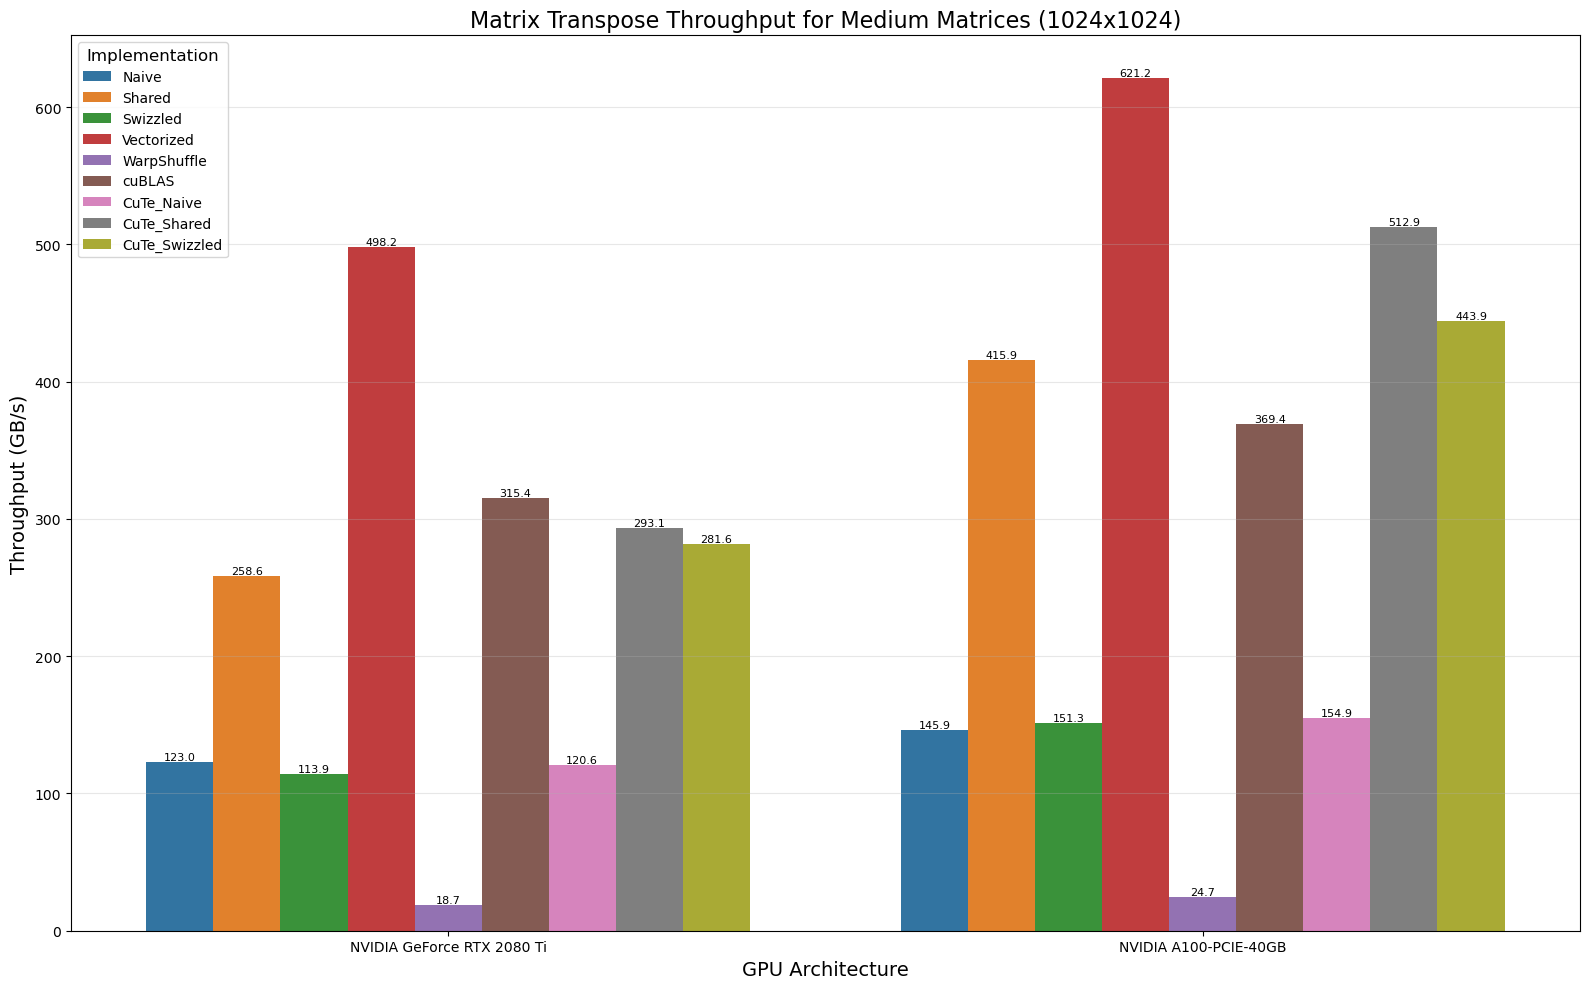

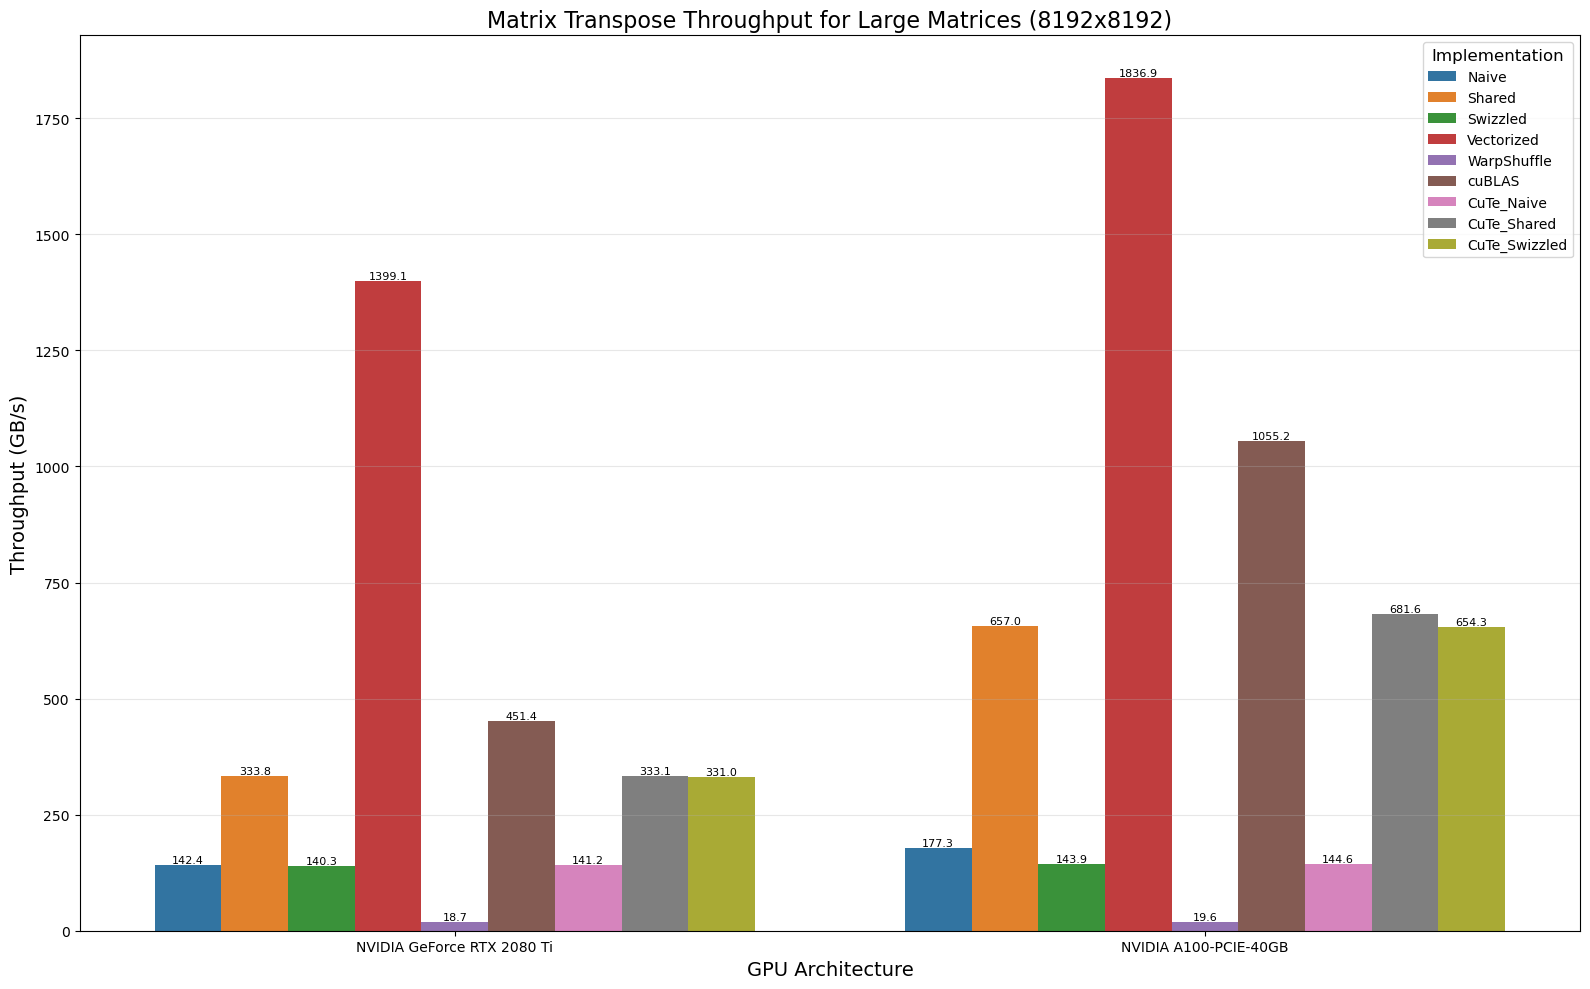

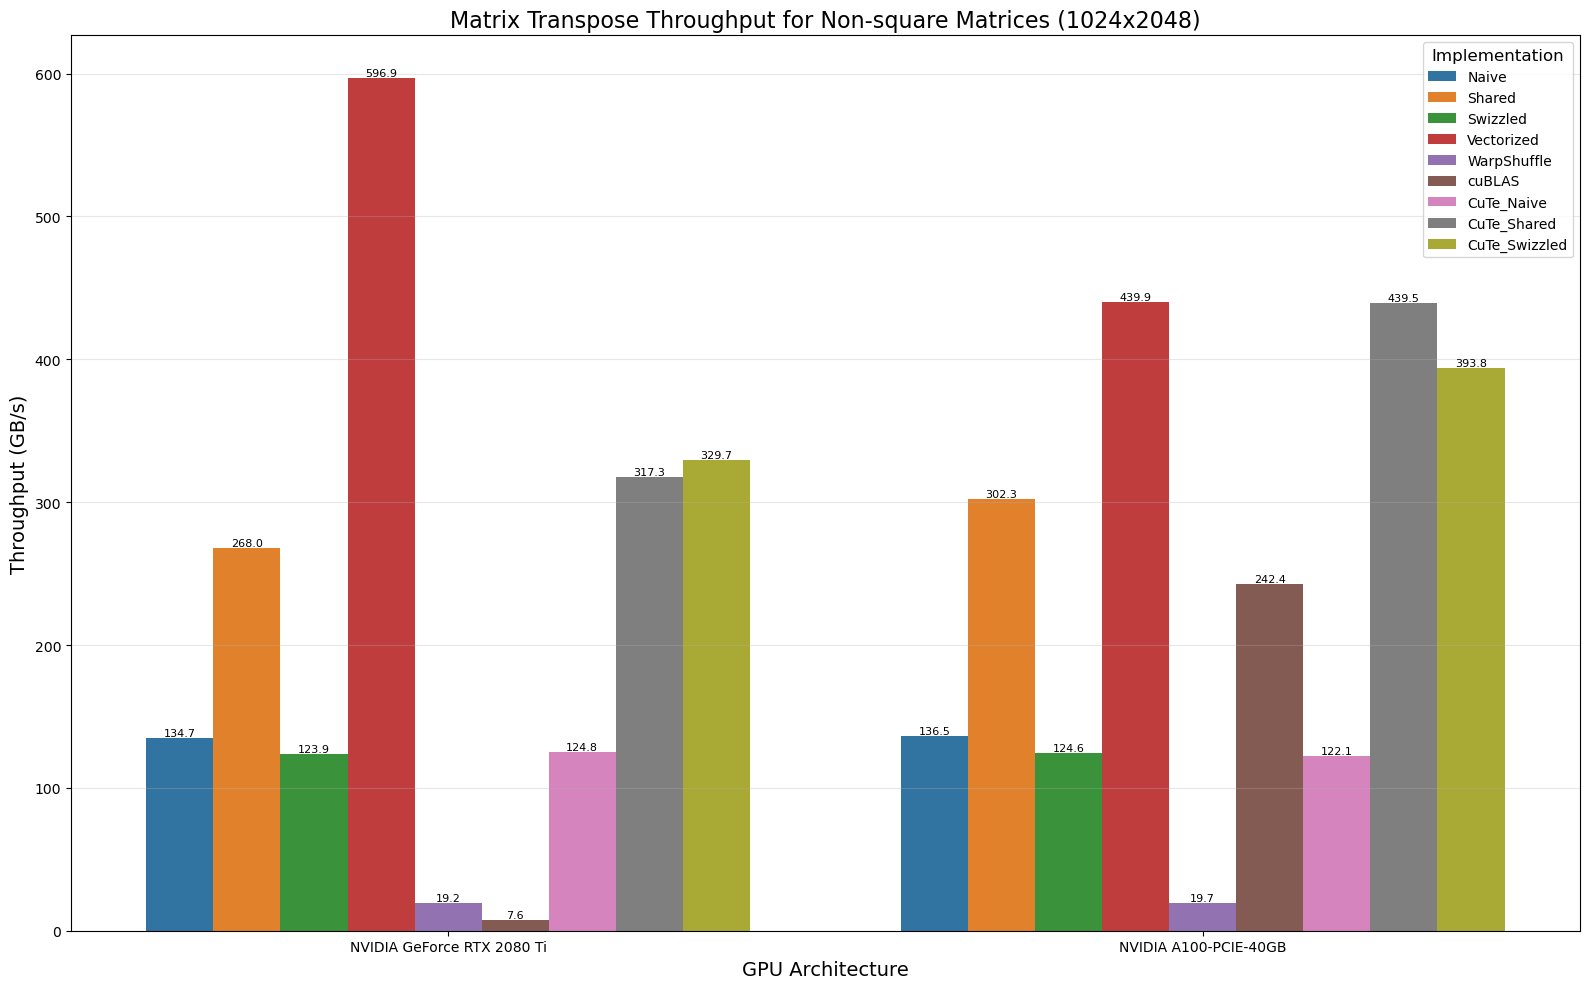

In [7]:
# Visualization: Matrix Size Impact on Throughput - Separated by matrix size categories

# Create a matrix size label for easier plotting
all_data['Matrix_Size'] = all_data.apply(lambda row: f"{row['M']}x{row['N']}", axis=1)

# Define the matrix size categories
small_mask = all_data['Matrix_Size'] == '32x32'
medium_mask = all_data['Matrix_Size'] == '1024x1024'
large_mask = all_data['Matrix_Size'] == '8192x8192'
nonsquare_mask = all_data['Matrix_Size'] == '1024x2048'

# Create a figure for small matrices (32x32)
plt.figure(figsize=(16, 10))
ax_small = sns.barplot(x='GPU', y='Throughput_GBps', hue='Implementation', 
                 data=all_data[small_mask], errorbar=None)

plt.title('Matrix Transpose Throughput for Small Matrices (32x32)', fontsize=16)
plt.xlabel('GPU Architecture', fontsize=14)
plt.ylabel('Throughput (GB/s)', fontsize=14)
plt.legend(title='Implementation', fontsize=10, title_fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for container in ax_small.containers:
    ax_small.bar_label(container, fmt='%.1f', fontsize=8)

plt.tight_layout()
plt.savefig('throughput_small_matrices.png', dpi=300)
plt.show()

# Create a figure for medium matrices (1024x1024)
plt.figure(figsize=(16, 10))
ax_medium = sns.barplot(x='GPU', y='Throughput_GBps', hue='Implementation', 
                 data=all_data[medium_mask], errorbar=None)

plt.title('Matrix Transpose Throughput for Medium Matrices (1024x1024)', fontsize=16)
plt.xlabel('GPU Architecture', fontsize=14)
plt.ylabel('Throughput (GB/s)', fontsize=14)
plt.legend(title='Implementation', fontsize=10, title_fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for container in ax_medium.containers:
    ax_medium.bar_label(container, fmt='%.1f', fontsize=8)

plt.tight_layout()
plt.savefig('throughput_medium_matrices.png', dpi=300)
plt.show()

# Create a figure for large matrices (8192x8192)
plt.figure(figsize=(16, 10))
ax_large = sns.barplot(x='GPU', y='Throughput_GBps', hue='Implementation', 
                 data=all_data[large_mask], errorbar=None)

plt.title('Matrix Transpose Throughput for Large Matrices (8192x8192)', fontsize=16)
plt.xlabel('GPU Architecture', fontsize=14)
plt.ylabel('Throughput (GB/s)', fontsize=14)
plt.legend(title='Implementation', fontsize=10, title_fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for container in ax_large.containers:
    ax_large.bar_label(container, fmt='%.1f', fontsize=8)

plt.tight_layout()
plt.savefig('throughput_large_matrices.png', dpi=300)
plt.show()

# Create a figure for non-square matrices (1024x2048)
plt.figure(figsize=(16, 10))
ax_nonsquare = sns.barplot(x='GPU', y='Throughput_GBps', hue='Implementation', 
                 data=all_data[nonsquare_mask], errorbar=None)

plt.title('Matrix Transpose Throughput for Non-square Matrices (1024x2048)', fontsize=16)
plt.xlabel('GPU Architecture', fontsize=14)
plt.ylabel('Throughput (GB/s)', fontsize=14)
plt.legend(title='Implementation', fontsize=10, title_fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for container in ax_nonsquare.containers:
    ax_nonsquare.bar_label(container, fmt='%.1f', fontsize=8)

plt.tight_layout()
plt.savefig('throughput_nonsquare_matrices.png', dpi=300)
plt.show()

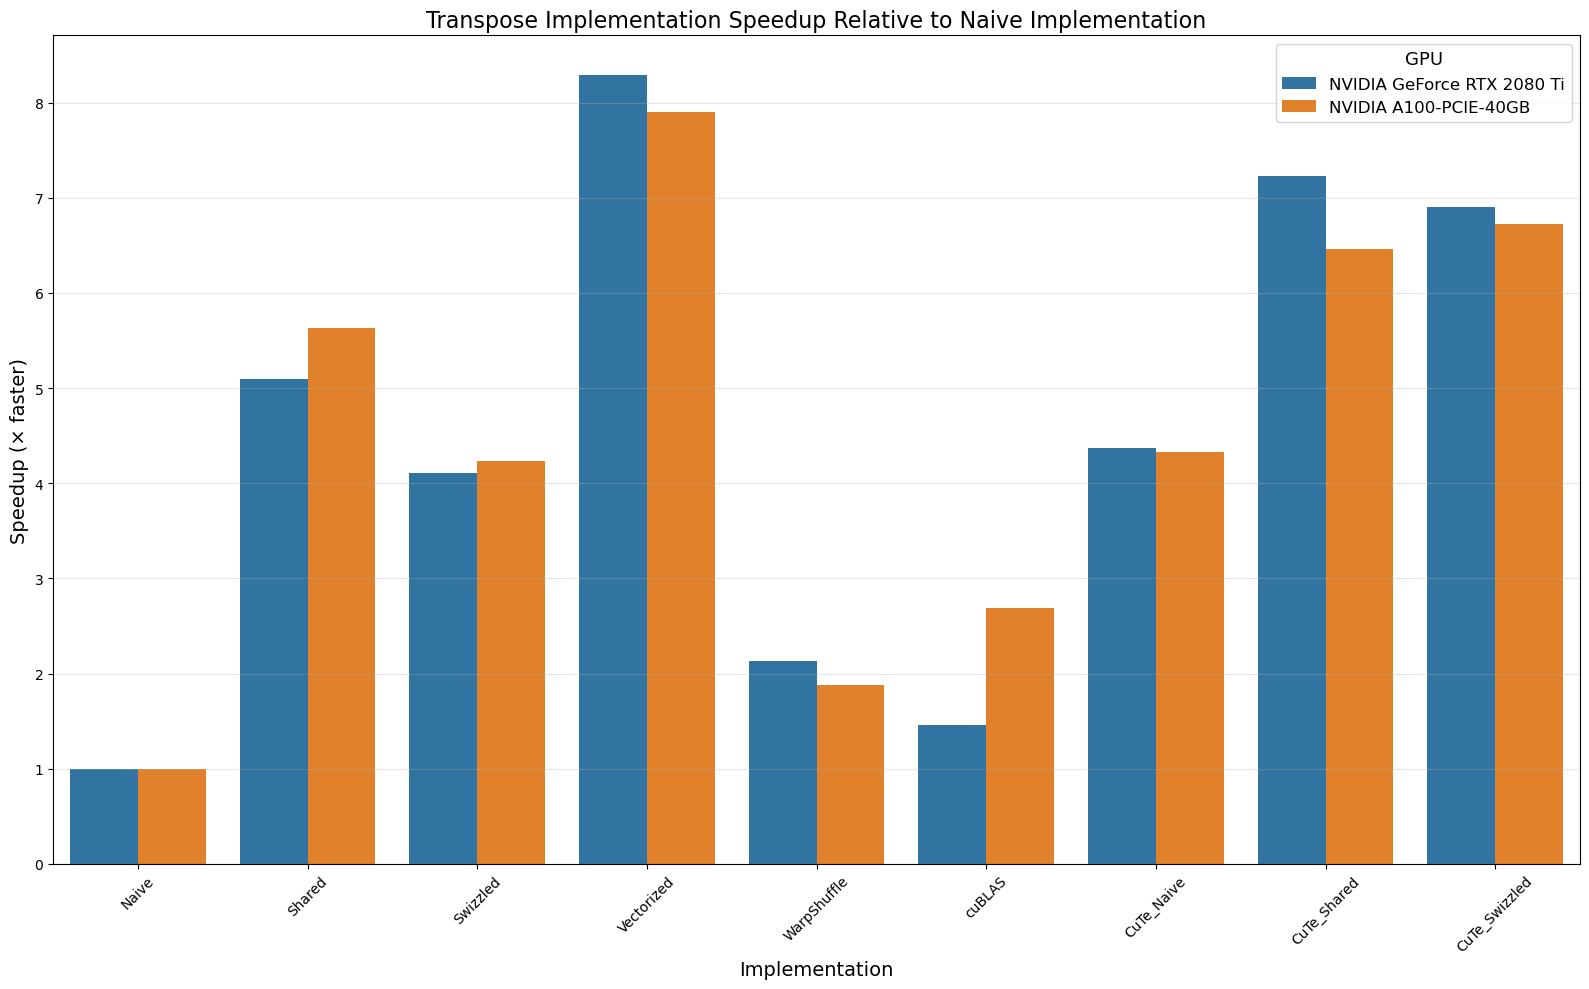

In [9]:
# 3. Visualization: Comparative Performance Analysis
# Calculate speedup relative to naive implementation for each GPU and matrix size
for gpu in all_data['GPU'].unique():
    for size in all_data['Matrix_Size'].unique():
        mask = (all_data['GPU'] == gpu) & (all_data['Matrix_Size'] == size)
        baseline = all_data.loc[mask & (all_data['Implementation'] == 'Naive'), 'Time_ms'].values
        if len(baseline) > 0:
            baseline = baseline[0]
            all_data.loc[mask, 'Speedup'] = baseline / all_data.loc[mask, 'Time_ms']

plt.figure(figsize=(16, 10))
sns.barplot(x='Implementation', y='Speedup', hue='GPU', data=all_data, errorbar=None)

plt.title('Transpose Implementation Speedup Relative to Naive Implementation', fontsize=16)
plt.xlabel('Implementation', fontsize=14)
plt.ylabel('Speedup (× faster)', fontsize=14)
plt.legend(title='GPU', fontsize=12, title_fontsize=13)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('speedup_by_implementation.png', dpi=300)
plt.show()

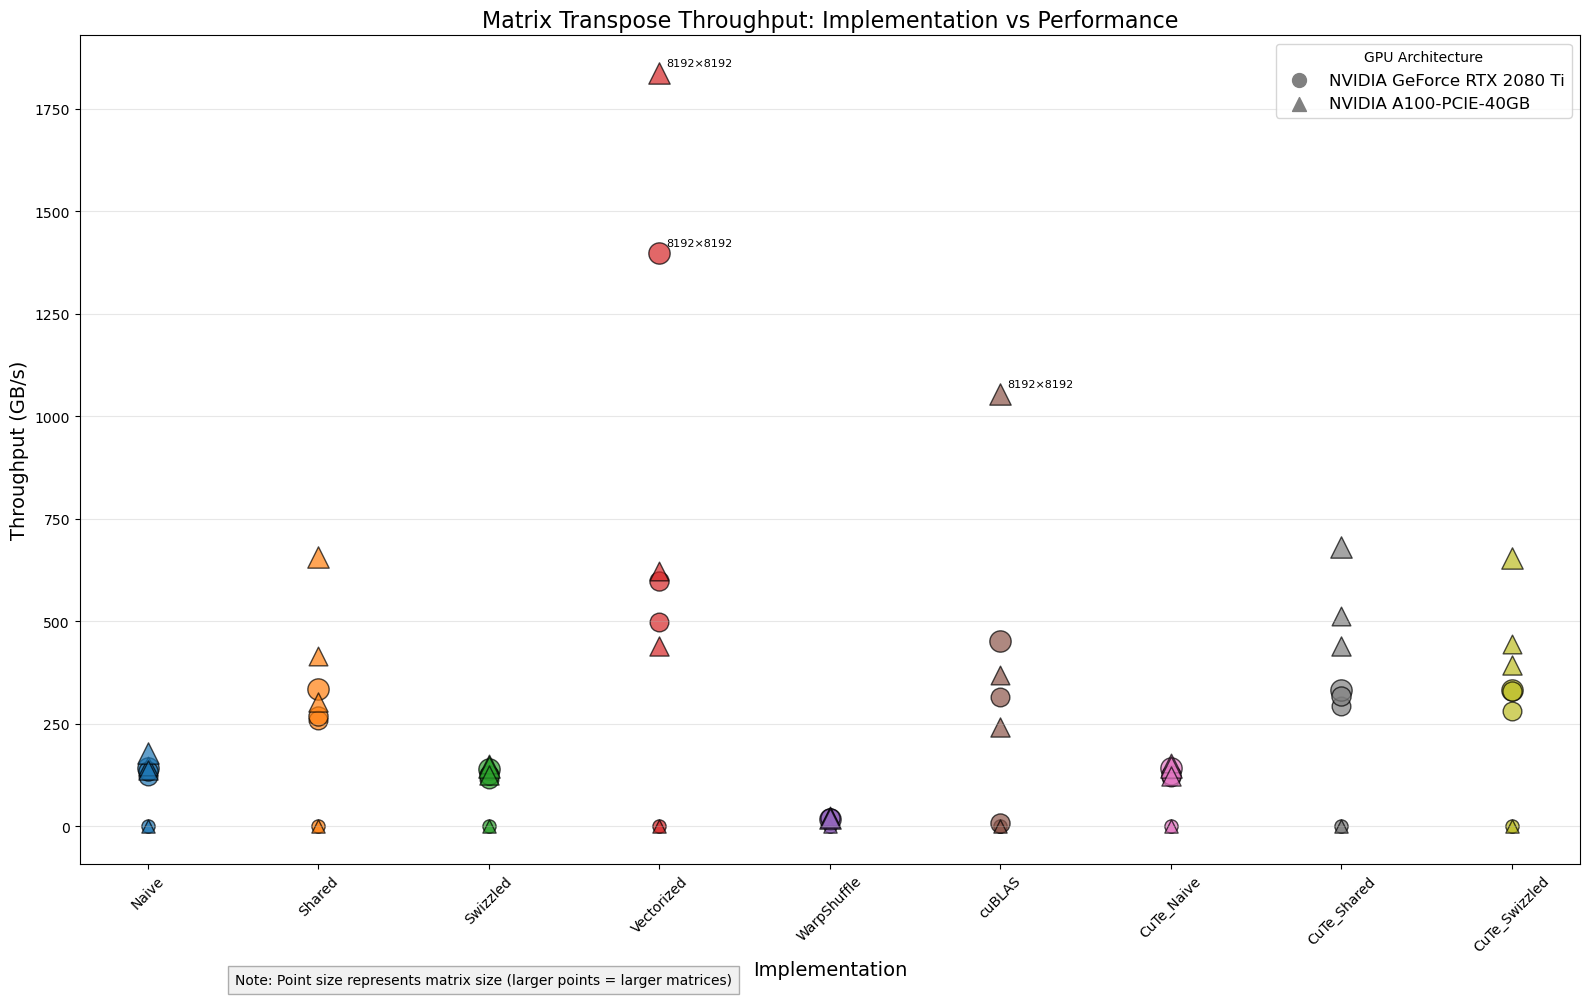

In [6]:
# Create a scatter plot comparing all implementations across GPUs
plt.figure(figsize=(16, 10))

# Create a custom color palette for implementations
implementation_colors = sns.color_palette("tab10", len(all_data['Implementation'].unique()))
implementation_color_dict = dict(zip(all_data['Implementation'].unique(), implementation_colors))

# Create a custom marker dictionary for GPUs
gpu_markers = {'NVIDIA GeForce RTX 2080 Ti': 'o', 'NVIDIA A100-PCIE-40GB': '^'}

# Plot each point
for impl in all_data['Implementation'].unique():
    for gpu in all_data['GPU'].unique():
        # Filter data for this implementation and GPU
        data_subset = all_data[(all_data['Implementation'] == impl) & (all_data['GPU'] == gpu)]
        
        # Plot points with size proportional to matrix size
        for _, row in data_subset.iterrows():
            size = row['M'] * row['N']  # Matrix size (total elements)
            # Scale the size for visibility (adjust this multiplier as needed)
            marker_size = np.log10(size) * 30
            
            plt.scatter(
                x=row['Implementation'], 
                y=row['Throughput_GBps'],
                s=marker_size,
                color=implementation_color_dict[impl],
                marker=gpu_markers[gpu],
                alpha=0.7,
                edgecolor='black',
                linewidth=1
            )

# Add annotations for matrix sizes on selected points
for impl in all_data['Implementation'].unique():
    for gpu in all_data['GPU'].unique():
        data_subset = all_data[(all_data['Implementation'] == impl) & (all_data['GPU'] == gpu)]
        for _, row in data_subset.iterrows():
            if row['Throughput_GBps'] > all_data['Throughput_GBps'].max() * 0.5:  # Only label high throughput points
                plt.annotate(
                    f"{row['M']}×{row['N']}",
                    (row['Implementation'], row['Throughput_GBps']),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=8
                )

# Add a legend for GPU markers
for gpu, marker in gpu_markers.items():
    plt.scatter([], [], marker=marker, color='gray', s=100, label=gpu)

# Improve the aesthetics
plt.title('Matrix Transpose Throughput: Implementation vs Performance', fontsize=16)
plt.xlabel('Implementation', fontsize=14)
plt.ylabel('Throughput (GB/s)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.legend(title='GPU Architecture', fontsize=12)

# Add a text box explaining point sizes
plt.figtext(0.15, 0.01, "Note: Point size represents matrix size (larger points = larger matrices)", 
            ha="left", fontsize=10, bbox={"facecolor":"lightgray", "alpha":0.3, "pad":5})

plt.tight_layout()
plt.savefig('throughput_scatter_plot.png', dpi=300)
plt.show()

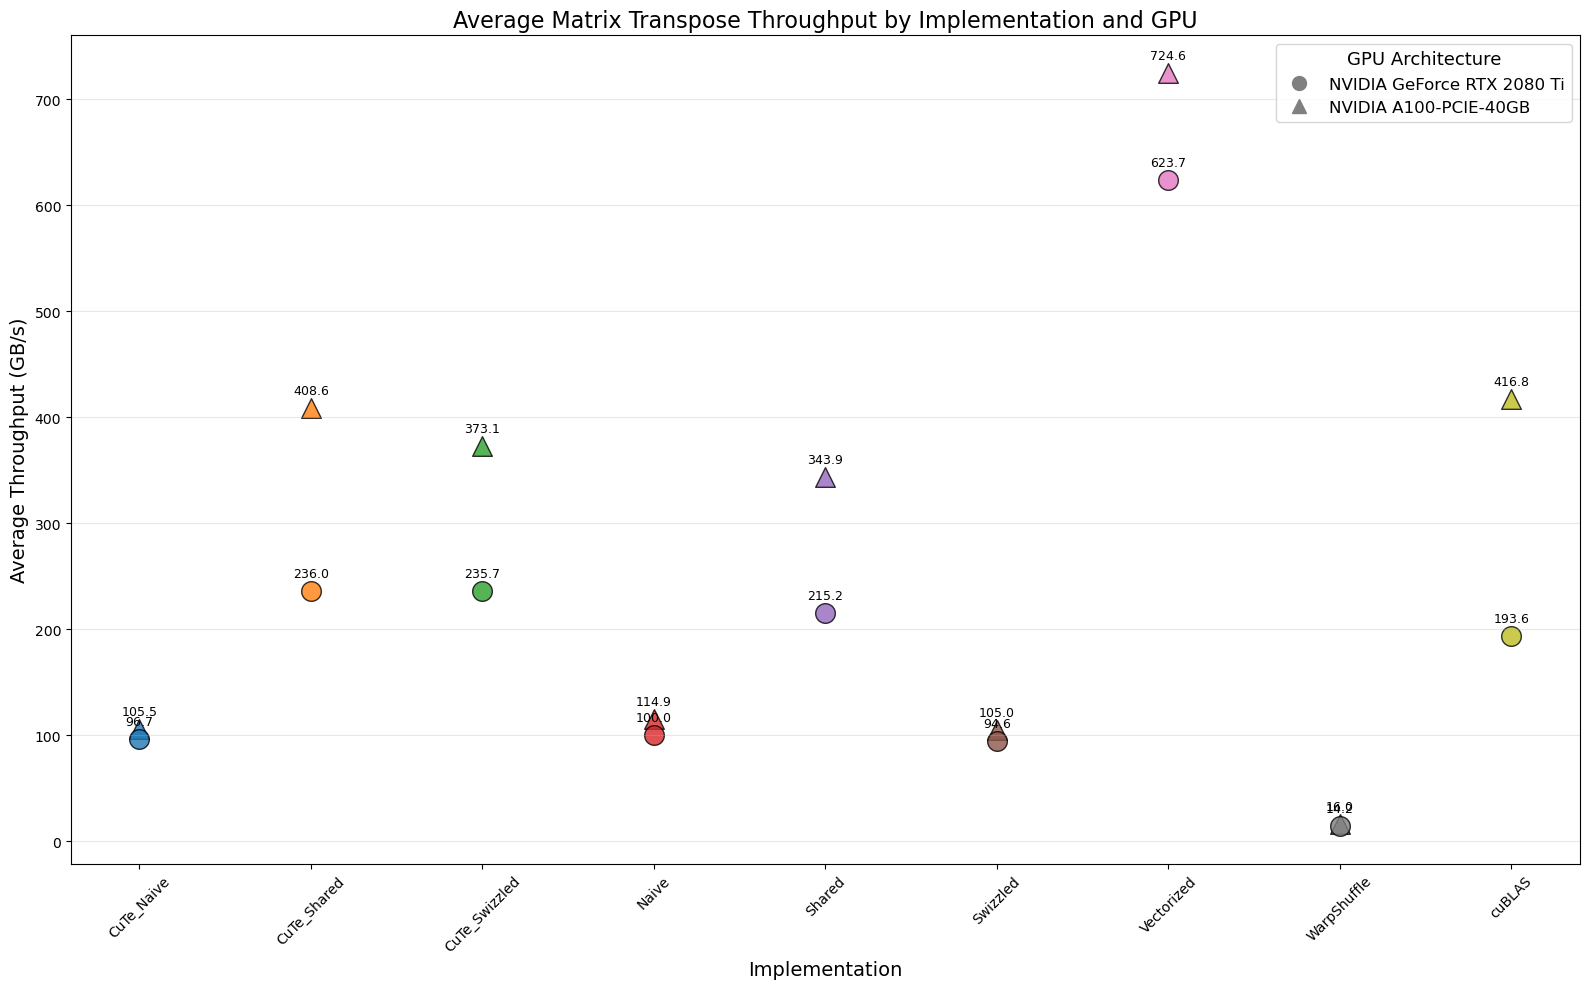

In [7]:
# Calculate average throughput by Implementation and GPU
avg_performance = all_data.groupby(['GPU', 'Implementation'])['Throughput_GBps'].mean().reset_index()

# Create a scatter plot of average throughput
plt.figure(figsize=(16, 10))

# Create markers and colors
gpu_markers = {'NVIDIA GeForce RTX 2080 Ti': 'o', 'NVIDIA A100-PCIE-40GB': '^'}
colors = sns.color_palette('tab10', n_colors=len(avg_performance['Implementation'].unique()))

# Plot points
for i, impl in enumerate(avg_performance['Implementation'].unique()):
    for gpu in avg_performance['GPU'].unique():
        subset = avg_performance[(avg_performance['Implementation'] == impl) & 
                                (avg_performance['GPU'] == gpu)]
        if not subset.empty:
            plt.scatter(
                i, subset['Throughput_GBps'].values[0],
                s=200,  # Fixed size
                color=colors[i],
                marker=gpu_markers[gpu],
                edgecolor='black',
                linewidth=1,
                alpha=0.8,
                label=f"{gpu} - {impl}" if i == 0 else ""
            )
            
            # Add labels
            plt.annotate(
                f"{subset['Throughput_GBps'].values[0]:.1f}",
                (i, subset['Throughput_GBps'].values[0]),
                xytext=(0, 10),
                textcoords='offset points',
                ha='center',
                fontsize=9
            )

# Improve aesthetics
plt.title('Average Matrix Transpose Throughput by Implementation and GPU', fontsize=16)
plt.xlabel('Implementation', fontsize=14)
plt.ylabel('Average Throughput (GB/s)', fontsize=14)
plt.xticks(range(len(avg_performance['Implementation'].unique())), 
           avg_performance['Implementation'].unique(), rotation=45)
plt.grid(axis='y', alpha=0.3)

# Create custom legend for GPU markers only
handles = [plt.Line2D([0], [0], marker=marker, color='gray', markersize=10, 
                     linestyle='None', label=gpu) 
           for gpu, marker in gpu_markers.items()]
plt.legend(handles=handles, title='GPU Architecture', fontsize=12, title_fontsize=13)

plt.tight_layout()
plt.savefig('avg_throughput_by_implementation.png', dpi=300)
plt.show()

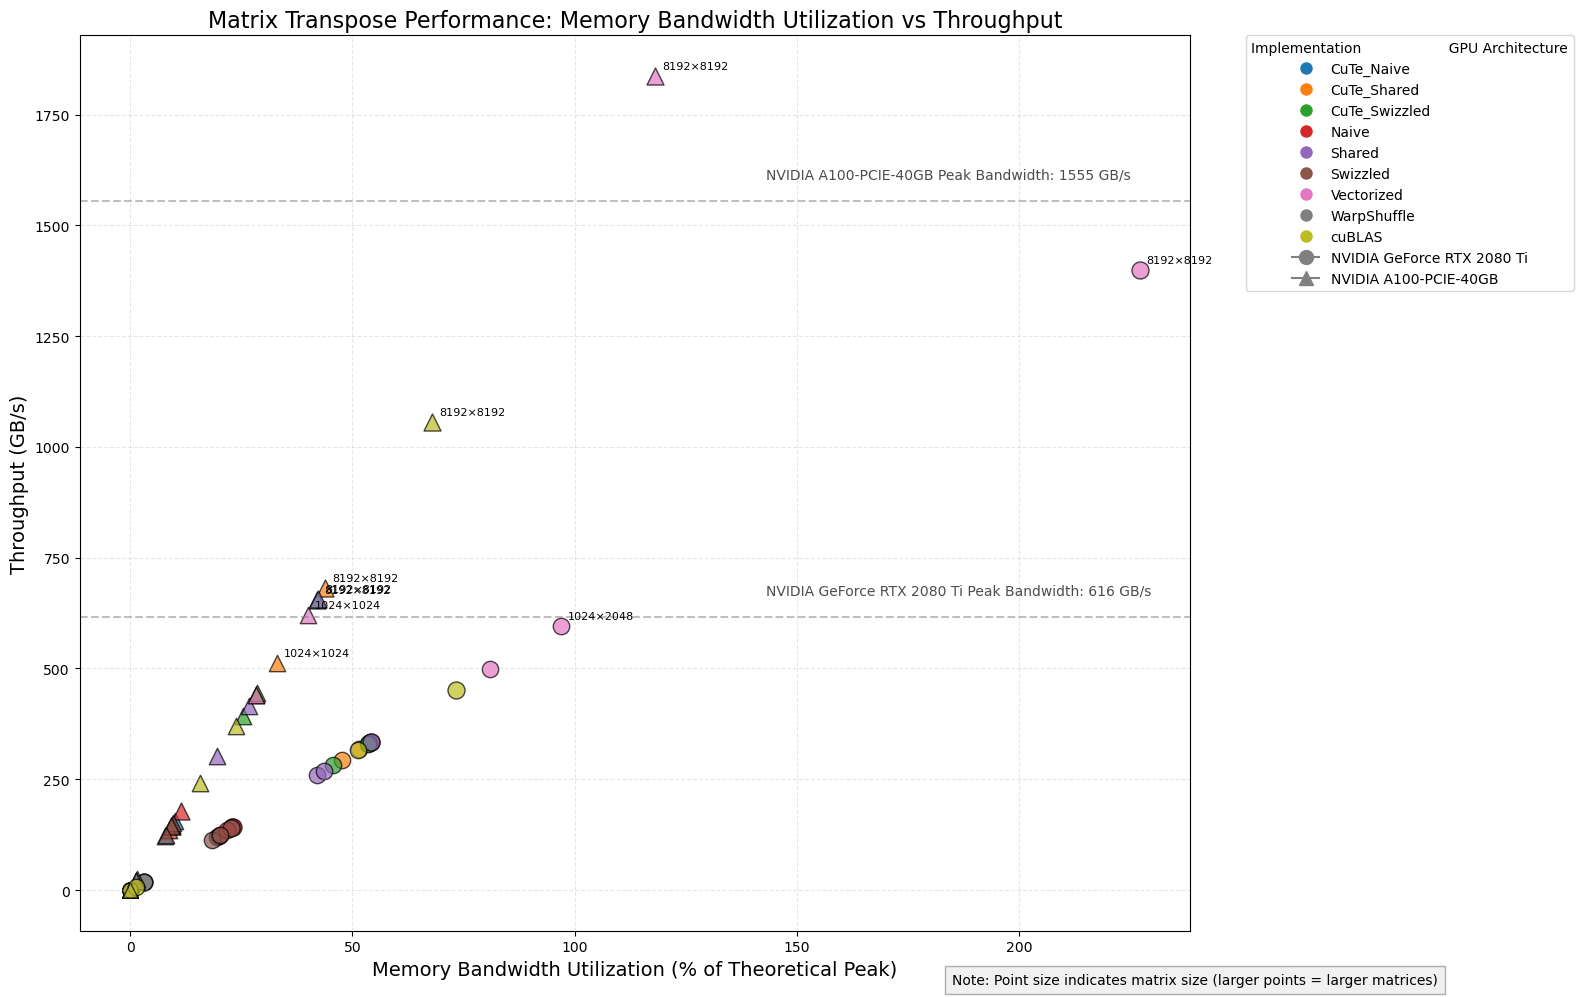

In [8]:
# Create a dictionary of theoretical peak memory bandwidth for each GPU (in GB/s)
peak_bandwidth = {
    'NVIDIA GeForce RTX 2080 Ti': 616,  # RTX 2080 Ti peak bandwidth
    'NVIDIA A100-PCIE-40GB': 1555       # A100 peak bandwidth
}

# Calculate memory utilization percentage
all_data['BW_Utilization'] = all_data.apply(
    lambda row: (row['Throughput_GBps'] / peak_bandwidth[row['GPU']]) * 100, axis=1
)

# Create a scatter plot with BW utilization as x-axis and throughput as y-axis
plt.figure(figsize=(16, 10))

# Create a color map for implementations
implementations = sorted(all_data['Implementation'].unique())
colors = sns.color_palette('tab10', n_colors=len(implementations))
impl_color_map = dict(zip(implementations, colors))

# Create marker map for GPU types
gpu_markers = {'NVIDIA GeForce RTX 2080 Ti': 'o', 'NVIDIA A100-PCIE-40GB': '^'}

# Create size map for matrix sizes
all_data['Matrix_Elements'] = all_data['M'] * all_data['N']
min_elements = all_data['Matrix_Elements'].min()
max_elements = all_data['Matrix_Elements'].max()

# Create the scatter plot
for impl in implementations:
    for gpu in all_data['GPU'].unique():
        subset = all_data[(all_data['Implementation'] == impl) & (all_data['GPU'] == gpu)]
        
        for _, row in subset.iterrows():
            # Scale the point size based on matrix size
            size_factor = 50 * (np.log10(row['Matrix_Elements']) / np.log10(max_elements))
            
            plt.scatter(
                row['BW_Utilization'], 
                row['Throughput_GBps'],
                s=100 + size_factor,
                color=impl_color_map[impl],
                marker=gpu_markers[gpu],
                alpha=0.7,
                edgecolor='black',
                linewidth=1
            )
            
            # Add text label for matrix size
            if row['Throughput_GBps'] > 500:  # Only label high-throughput points
                plt.annotate(
                    f"{int(row['M'])}×{int(row['N'])}",
                    (row['BW_Utilization'], row['Throughput_GBps']),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=8
                )

# Create custom legend for implementations
impl_patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=impl_color_map[impl], 
                          markersize=10, label=impl) for impl in implementations]

# Create custom legend for GPU markers
gpu_patches = [plt.Line2D([0], [0], marker=marker, color='gray', 
                         markersize=10, label=gpu) for gpu, marker in gpu_markers.items()]

# Add both legends
plt.legend(handles=impl_patches + gpu_patches, 
           title='Implementation                    GPU Architecture',
           loc='upper left', 
           fontsize=10,
           bbox_to_anchor=(1.05, 1),
           borderaxespad=0)

# Improve aesthetics
plt.title('Matrix Transpose Performance: Memory Bandwidth Utilization vs Throughput', fontsize=16)
plt.xlabel('Memory Bandwidth Utilization (% of Theoretical Peak)', fontsize=14)
plt.ylabel('Throughput (GB/s)', fontsize=14)
plt.grid(alpha=0.3, linestyle='--')

# Get the x axis limits
x_min, x_max = plt.xlim()

# Add a horizontal line representing the maximum utilization
for gpu in all_data['GPU'].unique():
    subset = all_data[all_data['GPU'] == gpu]
    plt.axhline(y=peak_bandwidth[gpu], color='gray', linestyle='--', alpha=0.5)
    
    # Place the text on the right side instead of the left
    plt.text(
        x_max * 0.60,  # Position at 75% of the x-axis
        peak_bandwidth[gpu] + 50,
        f"{gpu} Peak Bandwidth: {peak_bandwidth[gpu]} GB/s",
        fontsize=10, alpha=0.7
    )

# Add explanation for point sizes
plt.figtext(0.75, 0.01, 
            "Note: Point size indicates matrix size (larger points = larger matrices)", 
            ha="center", fontsize=10, 
            bbox={"facecolor":"lightgray", "alpha":0.3, "pad":5})

plt.tight_layout()
plt.savefig('memory_utilization_vs_throughput.png', dpi=300)
plt.show()

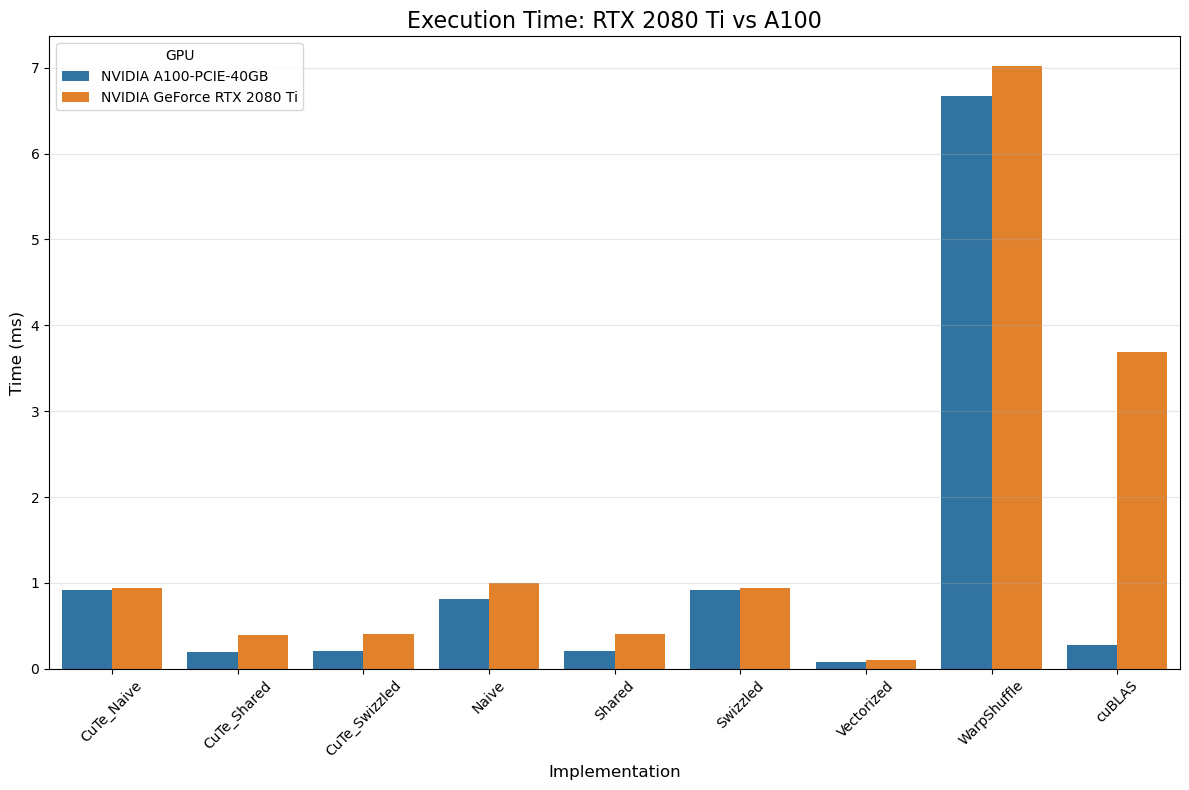

In [13]:
# Execution Time Comparison
plt.figure(figsize=(12, 8))

# Group by GPU and Implementation, calculate mean
time_data = all_data.groupby(['GPU', 'Implementation'])['Time_ms'].agg(['mean', 'std']).reset_index()

# Create bar plot for execution time
sns.barplot(x='Implementation', y='mean', hue='GPU', data=time_data, errorbar='sd', capsize=5)
plt.title('Execution Time: RTX 2080 Ti vs A100', fontsize=16)
plt.xlabel('Implementation', fontsize=12)
plt.ylabel('Time (ms)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('execution_time_comparison.png', dpi=300)
plt.show()

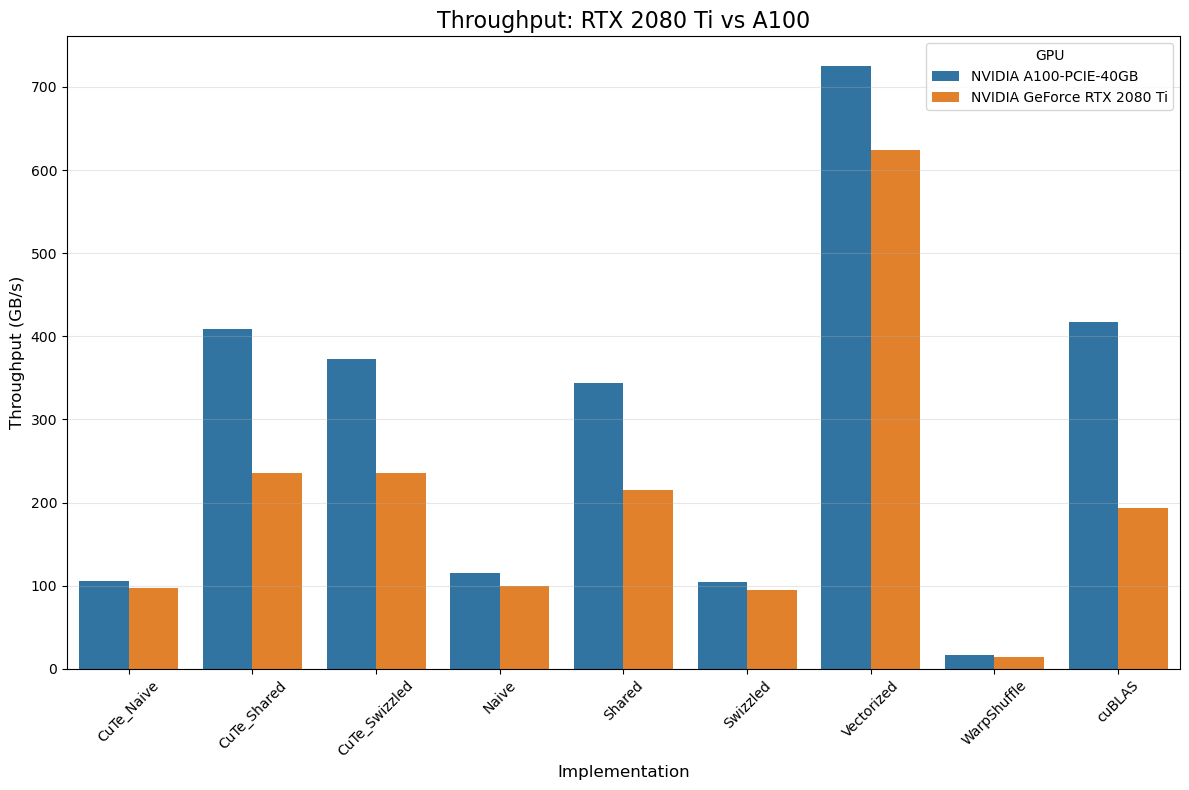

In [15]:
# Throughput Comparison
plt.figure(figsize=(12, 8))

# Group by GPU and Implementation, calculate mean
throughput_data = all_data.groupby(['GPU', 'Implementation'])['Throughput_GBps'].agg(['mean', 'std']).reset_index()

# Create bar plot for throughput
sns.barplot(x='Implementation', y='mean', hue='GPU', data=throughput_data, errorbar='sd', capsize=5)
plt.title('Throughput: RTX 2080 Ti vs A100', fontsize=16)
plt.xlabel('Implementation', fontsize=12)
plt.ylabel('Throughput (GB/s)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('throughput_comparison.png', dpi=300)
plt.show()

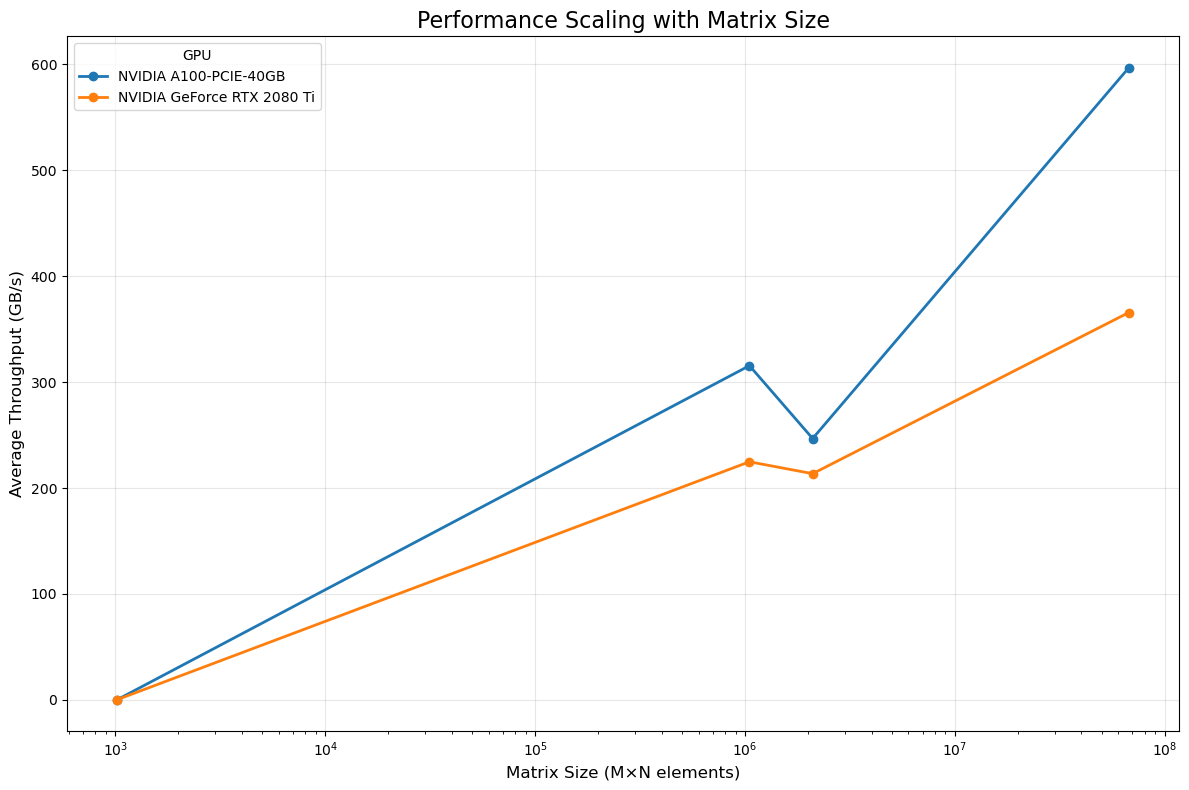

In [17]:
# Performance Scaling with Matrix Size
plt.figure(figsize=(12, 8))

# Calculate matrix sizes in elements
all_data['Elements'] = all_data['M'] * all_data['N']

# Group by GPU and Elements, and calculate mean throughput
size_scaling = all_data.groupby(['GPU', 'Elements'])['Throughput_GBps'].mean().reset_index()

# Sort by elements to ensure proper line plotting
size_scaling = size_scaling.sort_values('Elements')

# Create a line plot showing scaling
for gpu in size_scaling['GPU'].unique():
    gpu_data = size_scaling[size_scaling['GPU'] == gpu]
    plt.plot(gpu_data['Elements'], gpu_data['Throughput_GBps'], marker='o', linewidth=2, label=gpu)

plt.title('Performance Scaling with Matrix Size', fontsize=16)
plt.xlabel('Matrix Size (M×N elements)', fontsize=12)
plt.ylabel('Average Throughput (GB/s)', fontsize=12)
plt.xscale('log')
plt.grid(True, alpha=0.3)
plt.legend(title='GPU')
plt.tight_layout()
plt.savefig('performance_scaling.png', dpi=300)
plt.show()

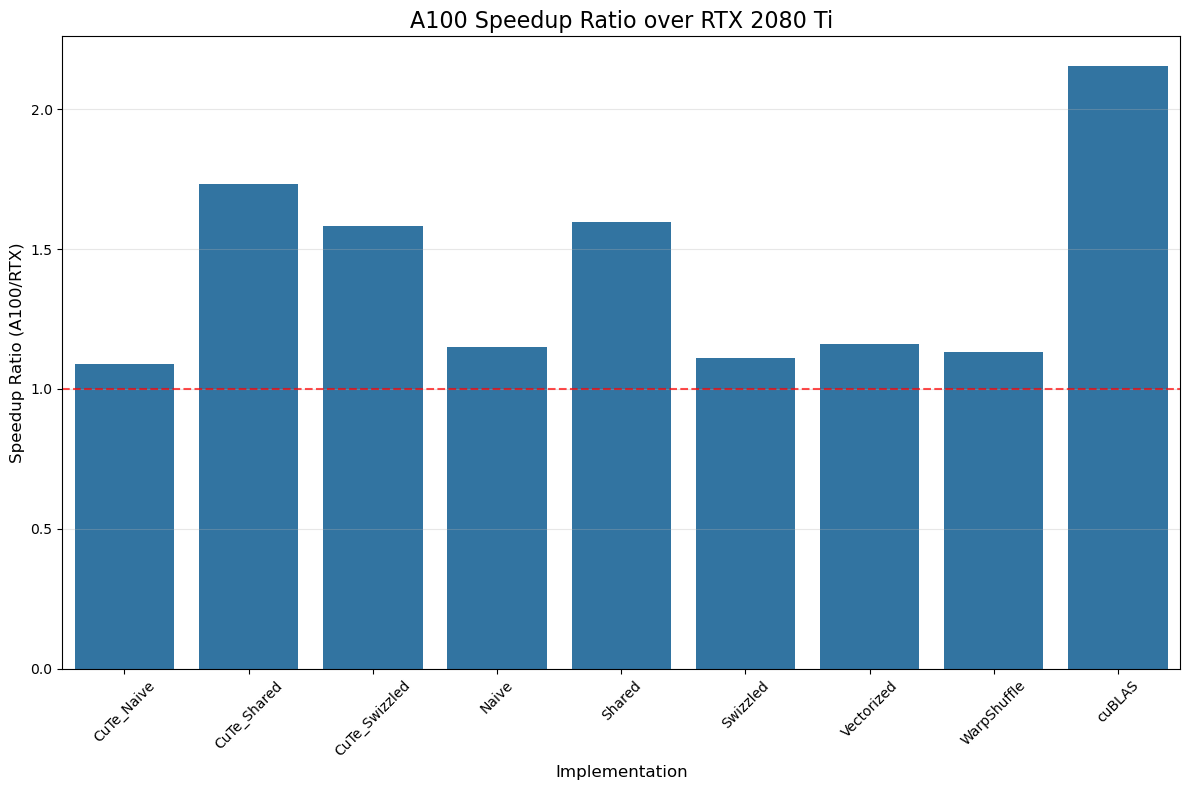

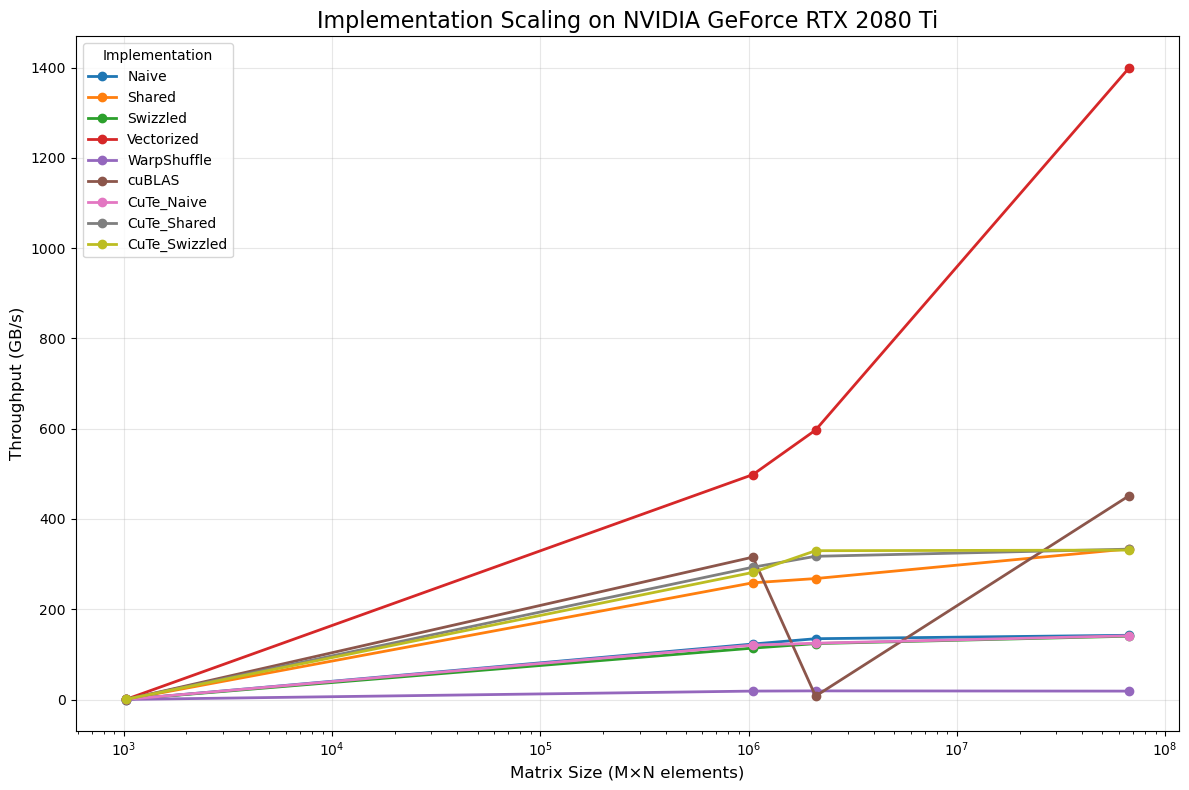

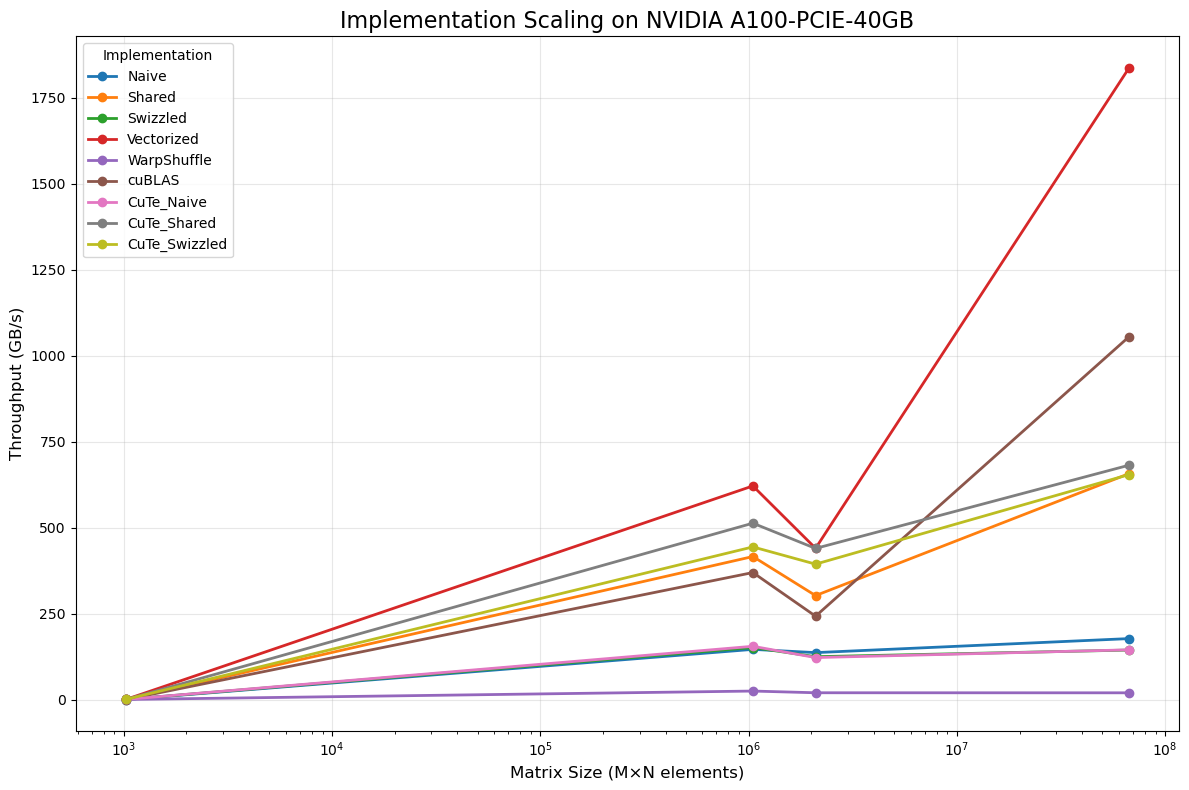

In [18]:
# A100 Speedup Ratio over RTX 2080 Ti
plt.figure(figsize=(12, 8))

# Calculate speedup for each implementation (averaging across matrix sizes)
speedup_data = pd.DataFrame()
for impl in throughput_data['Implementation'].unique():
    rtx_perf = throughput_data[(throughput_data['Implementation'] == impl) & 
                              (throughput_data['GPU'] == 'NVIDIA GeForce RTX 2080 Ti')]['mean'].values[0]
    a100_perf = throughput_data[(throughput_data['Implementation'] == impl) & 
                               (throughput_data['GPU'] == 'NVIDIA A100-PCIE-40GB')]['mean'].values[0]
    speedup_data = pd.concat([speedup_data, pd.DataFrame({
        'Implementation': [impl],
        'Speedup': [a100_perf / rtx_perf]
    })])

# Create a bar chart for speedup
sns.barplot(x='Implementation', y='Speedup', data=speedup_data)
plt.title('A100 Speedup Ratio over RTX 2080 Ti', fontsize=16)
plt.xlabel('Implementation', fontsize=12)
plt.ylabel('Speedup Ratio (A100/RTX)', fontsize=12)
plt.axhline(y=1.0, color='r', linestyle='--', alpha=0.7)  # Reference line at 1.0
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('a100_speedup_ratio.png', dpi=300)
plt.show()

# 5. Implementation Scaling by Matrix Size (for each GPU)
for gpu_name in all_data['GPU'].unique():
    plt.figure(figsize=(12, 8))
    
    gpu_data = all_data[all_data['GPU'] == gpu_name]
    
    for impl in gpu_data['Implementation'].unique():
        impl_data = gpu_data[gpu_data['Implementation'] == impl]
        impl_data = impl_data.sort_values('Elements')
        
        plt.plot(impl_data['Elements'], impl_data['Throughput_GBps'], 
                marker='o', linewidth=2, label=impl)
    
    plt.title(f'Implementation Scaling on {gpu_name}', fontsize=16)
    plt.xlabel('Matrix Size (M×N elements)', fontsize=12)
    plt.ylabel('Throughput (GB/s)', fontsize=12)
    plt.xscale('log')
    plt.grid(True, alpha=0.3)
    plt.legend(title='Implementation')
    plt.tight_layout()
    plt.savefig(f'implementation_scaling_{gpu_name.replace(" ", "_")}.png', dpi=300)
    plt.show()